In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE
import plotly.express as px
from numpy import log as ln
import utils
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN


In [2]:
data=pd.read_csv('/Users/nooreen/Desktop/High_margin/VIBE/e-commerce_report.ipynb/LC_data.csv')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.isna().sum()


Unnamed: 0                     0
Franchise \nStore              0
Business\nDate                 0
Date Time\nPlaced              0
Date Time\nFulfilled           0
Net\nAmount                    0
Quantity                       0
Royalty\nItem                  0
Taxable\nItem                  0
Order Id                       0
Item Id                        0
Menu Item\nName                0
Menu Item\nAccount             0
Bundle Name                    0
Employee                       0
Override\nApproval Employee    0
Order\nPlaced\nMethod          0
Order\nFulfilled\nMethod       0
Modified\nOrder\nAmount        0
Modification Reason            0
Payment\nMethods               0
Refunded                       0
Tax\nIncluded\nAmount          0
dtype: int64

In [4]:
data=data.dropna()


In [6]:
data.columns


Index(['Unnamed: 0', 'Franchise \nStore', 'Business\nDate',
       'Date Time\nPlaced', 'Date Time\nFulfilled', 'Net\nAmount', 'Quantity',
       'Royalty\nItem', 'Taxable\nItem', 'Order Id', 'Item Id',
       'Menu Item\nName', 'Menu Item\nAccount', 'Bundle Name', 'Employee',
       'Override\nApproval Employee', 'Order\nPlaced\nMethod',
       'Order\nFulfilled\nMethod', 'Modified\nOrder\nAmount',
       'Modification Reason', 'Payment\nMethods', 'Refunded',
       'Tax\nIncluded\nAmount'],
      dtype='object')

In [ ]:
data.groupby([])


In [148]:
data['Franchise_Store'].nunique()

data['Postal\nCode'].nunique()


74

In [149]:
print(data['Franchise_Store'].nunique())
print(data['Location'].nunique())


76
76


In [150]:

dictionary = dict(zip( data['CaesarVision_Store_Name'],data['Franchise_Store']))
missing_keys = set(data['Franchise_Store']) - set(dictionary.values())
missing_keys


{'01389-00011'}

In [151]:
data['City'].value_counts()


Wichita         6
Tulsa           2
Broken Arrow    2
Texarkana       2
Charlotte       2
               ..
Sand Springs    1
Owasso          1
Ponca City      1
Altus           1
El Dorado       1
Name: City, Length: 66, dtype: int64

In [152]:
data.head(2)


,Zone,Franchise_Store,Location,CaesarVision_Store_Name,Address,City,State,Postal\nCode,Latitude,Longitude,Hours_SUN_THU\nSUN-THU,Hours_FRI_SAT\nFRI-SAT,DMA,County/Parish,Population,Square_Miles_Area,Population_Density,Household_Estimate_Income,AADT
0,1940,01940-00009,Rose Hill - Alexandria VA,Rose Hill (01940-00009),6144 Rose Hill Dr,Alexandria,VA,22310,38.784089,-77.121199,11am-10pm,11am-11pm,"DC-MD-VA-Washington, DC (Hagrstwn)",Alexandria city,29611,6.743,4391.368827,160872,NaN
1,1978,01978-00002,Annandale VA,Annandale (01978-00002),7436 Little River Turnpike,Annandale,VA,22003,38.832683,-77.201915,11am-10pm,11am-11pm,"DC-MD-VA-Washington, DC (Hagrstwn)",Fairfax,59372,12.634,4699.382618,134109,NaN


In [153]:
#  couldn't find AADT information for the states of KS, NM, and VA.
# For these three, we can treat them differently and only use the variables Square_Miles_Area, Population_Density, and Household_Estimate_Income.
print(data['State'].nunique())
data['State'].value_counts()


9


TX    20
OK    17
KS    14
NC     7
NM     6
MD     6
VA     3
LA     2
AR     1
Name: State, dtype: int64

In [154]:
data[data['AADT'].isna()]['Postal\nCode'].unique()


array([22310, 22003, 22204, 88240, 88101, 88220, 88210, 88203, 88201,
       67846, 67901, 66801, 66502, 66441, 67203, 67037, 67212, 67207,
       67401, 67218, 67217, 67601])

In [155]:
data[~data['State'].isin(['KS', 'NM','VA'])].head(5)


,Zone,Franchise_Store,Location,CaesarVision_Store_Name,Address,City,State,Postal\nCode,Latitude,Longitude,Hours_SUN_THU\nSUN-THU,Hours_FRI_SAT\nFRI-SAT,DMA,County/Parish,Population,Square_Miles_Area,Population_Density,Household_Estimate_Income,AADT
3,1389,01389-00001,Nacogdoches TX,Nacogdoches (01389-00001),1500 North Street,Nacogdoches,TX,75965,31.616375,-94.652333,11am-10pm,11am-11pm,TX-Tyler-Longview(Lfkn&Ncgd),Nacogdoches,17652,77.061,229.065286,52640,23917.0
4,1389,01389-00002,Texarkana 1 TX Richmond Rd,Texarkana 1 (01389-00002),3634 Richmond Rd,Texarkana,TX,75503,33.470847,-94.094712,11am-10pm,11am-11pm,LA-TX-Shreveport-Texarkana,Bowie,25547,78.474,325.547315,67733,19385.0
5,1389,01389-00003,Texarkana 2 TX Texas Blvd,Texarkana 2 (01389-0003),4847 Texas Blvd,Texarkana,TX,75503,33.461126,-94.043744,11am-10pm,11am-11pm,LA-TX-Shreveport-Texarkana,Bowie,25547,78.474,325.547315,67733,12780.0
6,1389,01389-00004,Paris TX,Paris (01389-00004),2010 Lamar Ave,Paris,TX,75460,33.660823,-95.535008,11am-10pm,11am-11pm,TX-Dallas-Ft. Worth,Lamar,22925,101.851,225.083701,44241,12779.0
7,1389,01389-00005,Sulphur Springs TX,Sulphur Springs (01389-00005),610 Gilmer St,Sulphur Springs,TX,75482,33.131049,-95.600679,11am-10pm,11am-11pm,TX-Dallas-Ft. Worth,Hopkins,25743,313.535,82.105666,64049,7421.0


In [156]:
data[data['State'].isin(['KS', 'NM','VA'])]['Postal\nCode'].unique()


array([22310, 22003, 22204, 88240, 88101, 88220, 88210, 88203, 88201,
       67846, 67901, 66801, 66502, 66441, 67203, 67037, 67212, 67207,
       67401, 67218, 67217, 67601])

In [157]:
data.columns


Index(['Zone', 'Franchise_Store', 'Location', 'CaesarVision_Store_Name',
       'Address', 'City', 'State', 'Postal\nCode', 'Latitude', 'Longitude',
       'Hours_SUN_THU\nSUN-THU', 'Hours_FRI_SAT\nFRI-SAT', 'DMA',
       'County/Parish', 'Population', 'Square_Miles_Area',
       'Population_Density', 'Household_Estimate_Income', 'AADT'],
      dtype='object')

In [158]:
Franchise_Store=data['Franchise_Store'].values


In [159]:
input_data=data[['Square_Miles_Area','Population_Density', 'Household_Estimate_Income', 'AADT']]


In [160]:
df_51=input_data.dropna()
df_51.columns


Index(['Square_Miles_Area', 'Population_Density', 'Household_Estimate_Income',
       'AADT'],
      dtype='object')

In [161]:
df_76=input_data.drop(columns='AADT')
df_76.columns


Index(['Square_Miles_Area', 'Population_Density', 'Household_Estimate_Income'], dtype='object')

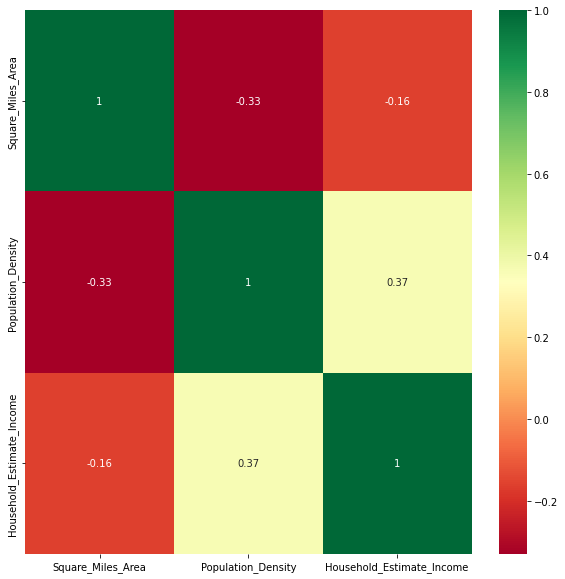

In [162]:
corrmat = df_76.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10,10))

g=sns.heatmap(df_76.corr(),annot=True,cmap="RdYlGn")


In [51]:
df_51.var()


Square_Miles_Area            1.337566e+05
Population_Density           6.767106e+06
Household_Estimate_Income    3.103037e+08
AADT                         1.017311e+08
dtype: float64

In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_76)
def twoD_tsne(scaled_data):
        tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,random_state=0)
        tsne_results = tsne.fit_transform(scaled_data)
        tsne_df = pd.DataFrame(data = tsne_results,columns=['tsne1','tsne2'])
        # tsne_df = pd.concat([tsne_df, pd.DataFrame({'cluster':labels})], axis=1)
        fig = px.scatter(tsne_df,x="tsne1", y="tsne2",
                         width=400, height=300,title='2D View of Data points')
        fig.show()  
twoD_tsne(scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 76 samples in 0.000s...
[t-SNE] Computed neighbors for 76 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 76 / 76
[t-SNE] Mean sigma: 0.689187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.735722
[t-SNE] KL divergence after 800 iterations: 0.481551


In [53]:
def threeD_tsne(scaled_data):
    tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
    
    fig = px.scatter_3d(tsne_df, x="tsne1", y="tsne2", z="tsne3",
                         width=500, height=400)
    
    fig.show()
threeD_tsne(scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 76 samples in 0.000s...
[t-SNE] Computed neighbors for 76 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 76 / 76
[t-SNE] Mean sigma: 0.689187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.231155
[t-SNE] KL divergence after 1000 iterations: 2.282259


# bscan


In [54]:
import math
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_76)

dist_matrics=['cosine','euclidean','manhattan','l1','l2','cityblock']
min_sample1=round(ln(input_data.shape[0]))
k1=min_sample1

min_sample2=input_data.shape[1]*2
k2=min_sample2-1

min_sample3=round(math.sqrt(scaled_data.shape[0]))
k3=min_sample3

min_sample4=round((1/2)*(scaled_data.shape[1]))
k4=min_sample4

min_sample_k={min_sample1:[k1,'round(ln(input_data.shape[0]))',"min_sample1"],
              min_sample2:[k2,'input_data.shape[1]*2','min_sample2-1'],
              min_sample3:[k3,'round(math.sqrt(scaled_data.shape[0]))','min_sample'],
              min_sample3:[k4,'round((1/2)*(scaled_data.shape[1]))','min_sample']
              }
             
data=scaled_data.copy()

utils.dbscan_on_multiple_matrics(data,dist_matrics,min_sample_k)



dist_matrics: cosine
 min_sample_k:round(ln(input_data.shape[0]))
k:min_sample1
epsilon value for metric: cosine is 0.04832405244769078 
 1    33
 0    14
-1    11
 2     9
 3     5
 4     4
Name: cluster, dtype: int64
Silhouette Score on basis of cosine: 0.36
Calinski Harabasz Score on basis of cosine: 41.78
Davies Bouldin Score on basis of cosine: 1.08
_______________________________________________________

dist_matrics: euclidean
 min_sample_k:round(ln(input_data.shape[0]))
k:min_sample1
epsilon value for metric: euclidean is 0.6482440451036436 
 0    63
-1    13
Name: cluster, dtype: int64
Silhouette Score on basis of euclidean: 0.51
Calinski Harabasz Score on basis of euclidean: 17.04
Davies Bouldin Score on basis of euclidean: 1.93
_______________________________________________________

dist_matrics: manhattan
 min_sample_k:round(ln(input_data.shape[0]))
k:min_sample1
epsilon value for metric: manhattan is 0.8910906018149588 
 0    63
-1    13
Name: cluster, dtype: int64
Silhou

In [134]:
def dbscan_on_choosen_matrics(df,matric,min_sample,k,eps):     
        model = DBSCAN(eps=eps, min_samples=min_sample, metric=matric)
        labels = model.fit_predict(df)
        clus_data=pd.DataFrame()
        clus_data['cluster']=labels 
        print(clus_data['cluster'].value_counts())
        return labels

dist_matrics='cosine'
min_sample_k=round(ln(input_data.shape[0]))
k=min_sample1
epsilon= 0.04832405244769078 


labels=dbscan_on_choosen_matrics(data,dist_matrics,min_sample_k,k,epsilon)


 1    33
 0    14
-1    11
 2     9
 3     5
 4     4
Name: cluster, dtype: int64


In [236]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
def twoD_data_creation_with_boundaries(labels, scaled_data):
    # Perform t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
    tsne_df['cluster'] = labels
    
    # Separate noise points (-1) from clusters
    noise_df = tsne_df[tsne_df['cluster'] == -1]
    clustered_df = tsne_df[tsne_df['cluster'] != -1]
    
    clustered_df=clustered_df[clustered_df['cluster'].isin([-1,1])]
    # Plot clusters with different colors
    fig = px.scatter(clustered_df, x="tsne1", y="tsne2", color='cluster', symbol='cluster',
                     width=800, height=600)
    
    # Add noise points without boundary
    fig.add_trace(go.Scatter(
        x=noise_df['tsne1'], 
        y=noise_df['tsne2'],
        mode='markers',
        marker=dict(size=8, color='black', symbol='circle'),
        name='Noise (-1)'
    ))
    
    # Add convex hull boundaries for clusters
    for cluster_id in clustered_df['cluster'].unique():
        cluster_points = clustered_df[clustered_df['cluster'] == cluster_id][['tsne1', 'tsne2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))

    # Show the figure
    fig.show()
    return tsne_df


In [237]:
# utils.twoD_data_creation_with_boundaries(labels, scaled_data)tsne_df
tsne_df=twoD_data_creation_with_boundaries(labels, scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 76 samples in 0.000s...
[t-SNE] Computed neighbors for 76 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 76 / 76
[t-SNE] Mean sigma: 0.689187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.735722
[t-SNE] KL divergence after 800 iterations: 0.481551


In [257]:
tsne_df[tsne_df['cluster']==-1]


,tsne1,tsne2,cluster
10,-40.680378,-0.910149,-1
28,48.985703,17.050293,-1
32,-35.651672,35.149807,-1
40,119.893852,3.849157,-1
44,-62.291237,173.495605,-1
50,-6.834126,26.823969,-1
51,-43.874905,-43.694286,-1
58,-69.981102,24.123888,-1
59,-15.084272,-20.638336,-1
68,-85.994911,-16.126852,-1


In [139]:
i['labels']=labels


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# k-mean


In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


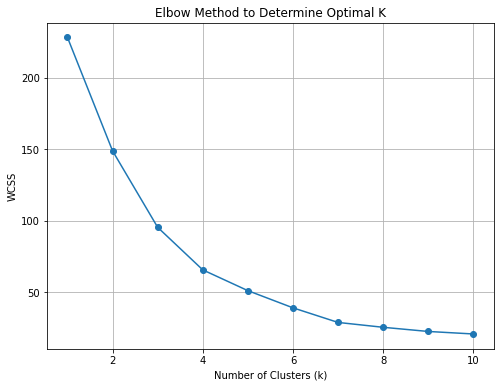

In [58]:

df=df_76.copy()
def choose_k_elbow(scaled_data, max_k=10):
    wcss = []  # Store Within-Cluster Sum of Squares for each k

    # Test K-Means with k ranging from 1 to max_k
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method to Determine Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()
choose_k_elbow(scaled_data, max_k=10)


In [59]:


k = 5 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=44)  # Set random_state for reproducibility
kmeans.fit(scaled_data)

# 3. Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# 4. Compute the Silhouette Score
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4650129196186847


In [60]:
def twoD_data_ceation(labels,scaled_data):
        tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,random_state=0)
        tsne_results = tsne.fit_transform(scaled_data)
        tsne_df = pd.DataFrame(data = tsne_results,columns=['tsne1','tsne2'])
        tsne_df = pd.concat([tsne_df, pd.DataFrame({'cluster':labels})], axis=1)
        fig = px.scatter(tsne_df,x="tsne1", y="tsne2", color='cluster',symbol='cluster',
                         color_discrete_map="identity", width=800, height=600)
        fig.show()
        
        
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def twoD_data_creation_with_boundaries(labels, scaled_data):
    # Perform t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
    tsne_df['cluster'] = labels
    # tsne_df=tsne_df[tsne_df['cluster']!=-1]
    
    # Plot points with cluster colors
    fig = px.scatter(tsne_df, x="tsne1", y="tsne2", color='cluster', symbol='cluster',
                     width=800, height=600)
    fig.update_traces(marker=dict(size=10)) 
    # Add convex hull boundaries
    for cluster_id in tsne_df['cluster'].unique():
        cluster_points = tsne_df[tsne_df['cluster'] == cluster_id][['tsne1', 'tsne2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))
    
    # Show the figure
    fig.show()


In [61]:
twoD_data_ceation(labels,scaled_data)


[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 76 samples in 0.000s...
[t-SNE] Computed neighbors for 76 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 76 / 76
[t-SNE] Mean sigma: 0.689187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.735722


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] KL divergence after 800 iterations: 0.481551


In [62]:
twoD_data_creation_with_boundaries(labels, scaled_data)



[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 76 samples in 0.000s...
[t-SNE] Computed neighbors for 76 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 76 / 76
[t-SNE] Mean sigma: 0.689187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.735722


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] KL divergence after 800 iterations: 0.481551


# hierarical 


In [63]:
df_76
df_51
input_data


,Square_Miles_Area,Population_Density,Household_Estimate_Income,AADT
0,6.743,4391.368827,160872,NaN
1,12.634,4699.382618,134109,NaN
2,4.119,12809.176985,109277,NaN
3,77.061,229.065286,52640,23917.0
4,78.474,325.547315,67733,19385.0
...,...,...,...,...
71,252.002,199.752383,62603,NaN
72,4.981,4626.380245,47905,NaN
73,14.428,2143.471029,54767,NaN
74,359.813,67.890821,58480,NaN


In [64]:
# codes=df_76['Postal\nCode'].values
# df_76=df_76.drop(columns=['Postal\nCode'])


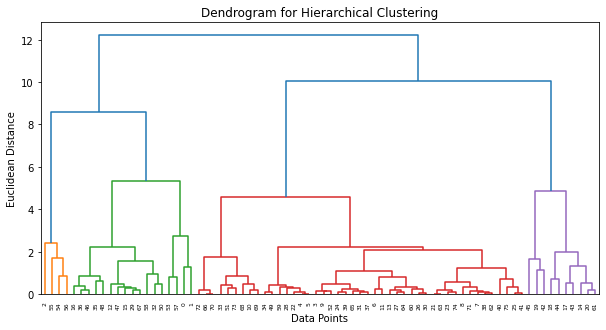

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

df=df_76.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Standardize features


# Step 2: Plot the Dendrogram to determine clusters
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [128]:
# Step 3: Choose Number of Clusters and Apply Agglomerative Clustering
n_clusters = 4  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = hc.fit_predict(df_scaled)  # Assign cluster labels

silhouette_avg = silhouette_score(df_scaled, df['Cluster'].values)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4856217506012906


In [131]:

twoD_data_creation_with_boundaries(df['Cluster'].values, df_scaled)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 76 samples in 0.000s...
[t-SNE] Computed neighbors for 76 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 76 / 76
[t-SNE] Mean sigma: 0.689187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.735722
[t-SNE] KL divergence after 800 iterations: 0.481551


In [279]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

def pca_2d(labels, scaled_data):
    # Perform PCA
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(scaled_data)
    
    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=pca_results, columns=['pca1', 'pca2'])
    pca_df['cluster'] = labels
    # pca_df = pca_df[pca_df['cluster'].isin([ -1,12])]
    
    # Plot points with cluster colors
    fig = px.scatter(pca_df, x="pca1", y="pca2", color='cluster', symbol='cluster',
                     width=800, height=600)
    fig.update_traces(marker=dict(size=10)) 
    
    # Add convex hull boundaries
    for cluster_id in pca_df['cluster'].unique():
        cluster_points = pca_df[pca_df['cluster'] == cluster_id][['pca1', 'pca2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))
    
    # Show the figure
    fig.show()


In [280]:
pca_2d(df['Cluster'].values, df_scaled)


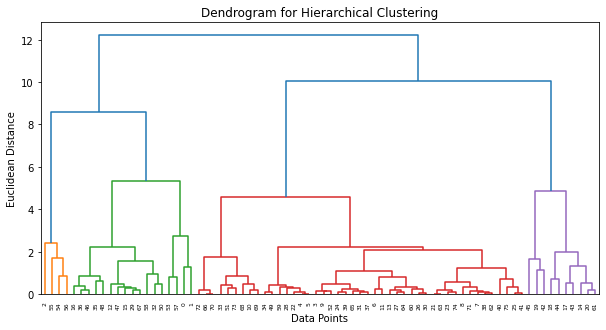

Silhouette Score: 0.4856217506012906


In [163]:
df=df_76.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Standardize features


# Step 2: Plot the Dendrogram to determine clusters
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


# Step 3: Choose Number of Clusters and Apply Agglomerative Clustering
n_clusters = 4  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = hc.fit_predict(df_scaled)  # Assign cluster labels

silhouette_avg = silhouette_score(df_scaled, df['Cluster'].values)
print(f"Silhouette Score: {silhouette_avg}")

pca_2d(df['Cluster'].values, df_scaled)


# rearraging clusters


In [286]:
df_final=pd.read_csv('vibe_clusters.csv')
def show_cluster(i):
    fig = px.scatter(
        df_final[df_final['Cluster'] == i], 
        x='Square_Miles_Area_x', 
        y='Population_Density_x', 
        opacity=0.7,  # Adjust transparency
        color_discrete_sequence=['blue']  # Set color
    )

    fig.update_layout(
        title="Scatterplot of Population Density vs Square Miles Area",
        xaxis_title="Square Miles Area",
        yaxis_title="Population Density",
        template="plotly_white"
    )

    fig.show()
for i in  range(0,df_final.Cluster.nunique()):
    print('clsuter ', i)
    show_cluster(i)


clsuter  0


clsuter  1


clsuter  2


clsuter  3


In [287]:
db_lab=labels
km_lab=df['Cluster'].values


In [288]:
df_76['db_lab']=labels
df_76['km_lab']=df['Cluster'].values


In [289]:
df_76[(df_76['km_lab']==2)& (df_76['db_lab'].isin([-1]))]


,Square_Miles_Area,Population_Density,Household_Estimate_Income,db_lab,km_lab,modkm_lab
10,11.466,2224.140938,68132,-1,2,4
28,129.811,235.958432,71569,-1,2,2
40,600.164,70.624029,65394,-1,2,2
51,14.933,1938.994174,60397,-1,2,4
59,45.234,983.242694,66465,-1,2,4
68,12.522,3480.833733,64957,-1,2,4
69,10.410,2703.458213,66400,-1,2,4


In [290]:
# to modify clusters
df_76['modkm_lab']=df_76['km_lab'].values


In [291]:

df_76['modkm_lab']=np.where((df_76['km_lab']==2)& (df_76['db_lab'].isin([-1,3])),4,df_76['modkm_lab'])


In [292]:
# re
df_76.loc[[28, 40], 'modkm_lab'] = 2



In [293]:
silhouette_avg = silhouette_score(scaled_data, df_76['modkm_lab'].values)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: 0.4120155221936265


In [294]:
silhouette_avg = silhouette_score(df_scaled, df_76['km_lab'].values)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: 0.4856217506012906


In [295]:
pca_2d( df_76['modkm_lab'].values, df_scaled)


In [296]:
pca_2d( df_76['km_lab'].values, df_scaled)


In [297]:
df_76[df_76['modkm_lab']==2]


,Square_Miles_Area,Population_Density,Household_Estimate_Income,db_lab,km_lab,modkm_lab
3,77.061,229.065286,52640,1,2,2
4,78.474,325.547315,67733,1,2,2
5,78.474,325.547315,67733,1,2,2
6,101.851,225.083701,44241,1,2,2
7,313.535,82.105666,64049,1,2,2
8,313.230,93.959710,67887,1,2,2
9,137.498,220.628664,53053,1,2,2
11,127.663,132.653940,39748,1,2,2
13,318.315,79.738624,51648,1,2,2
21,306.685,89.032721,57585,1,2,2


In [311]:
cluster_ariel=pd.read_excel('/Users/nooreen/Desktop/High margin/VIBE/cluster ariel.xlsx')
cluster_ariel.head(2)


,state,FranchiseStore,zip code,household income,population density,sq miles area,cluster,net amount,efficiency ratio,SEPC (Sales Efficiency per Capita),Combined Efficiency,Geometric Mean,Avg Geometric Mean per state per cluster
0,KS,03222-00044,67037,84666,559.690356,53.610,0,635185.94,7.502255,1134.888127,8514.220367,92.272533,92.272533
1,MD,01940-00021,20740,81359,4204.234973,8.784,0,1618979.16,19.899202,385.082939,7662.843119,87.537667,78.775023


In [312]:
cluster_ariel[cluster_ariel['cluster']==2]


,state,FranchiseStore,zip code,household income,population density,sq miles area,cluster,net amount,efficiency ratio,SEPC (Sales Efficiency per Capita),Combined Efficiency,Geometric Mean,Avg Geometric Mean per state per cluster
27,AR,01494-00005,71730,50845,67.995995,457.424,2,946679.59,18.618932,13922.578684,259223.543710,509.140004,509.140004
28,KS,03646-00004,67601,58480,67.890821,359.813,2,371605.78,6.354408,5473.579111,34781.354905,186.497600,212.456609
29,KS,03222-00010,67901,62222,68.405849,310.529,2,980269.03,15.754380,14330.193090,225763.306869,475.145564,212.456609
30,KS,03222-00021,66801,57771,90.910601,301.054,2,829107.29,14.351617,9120.028722,130887.163078,361.783310,212.456609
31,KS,03222-00027,66441,58876,113.812755,231.793,2,953884.39,16.201583,8381.172981,135788.268164,368.494597,212.456609
32,KS,03646-00001,67401,62603,199.752383,252.002,2,963360.84,15.388413,4822.775208,74214.858316,272.424041,212.456609
33,KS,03222-00026,66502,52363,200.200272,221.698,2,1337792.64,25.548434,6682.271825,170721.579486,413.184680,212.456609
34,KS,03646-00003,67217,54767,2143.471029,14.428,2,1389439.80,25.370018,648.219538,16445.341635,128.239392,212.456609
35,KS,03222-00046,67207,66400,2703.458213,10.410,2,879272.18,13.242051,325.239789,4306.841847,65.626533,212.456609
36,KS,03222-00045,67212,64957,3480.833733,12.522,2,989821.46,15.238103,284.363327,4333.157677,65.826725,212.456609


In [313]:
df_76[df_76['modkm_lab']==4]


,Square_Miles_Area,Population_Density,Household_Estimate_Income,db_lab,km_lab,modkm_lab
10,11.466,2224.140938,68132,-1,2,4
33,5.943,3038.027932,55118,3,2,4
51,14.933,1938.994174,60397,-1,2,4
59,45.234,983.242694,66465,-1,2,4
66,7.162,4258.307735,50411,3,2,4
68,12.522,3480.833733,64957,-1,2,4
69,10.410,2703.458213,66400,-1,2,4
70,7.162,4258.307735,50411,3,2,4
72,4.981,4626.380245,47905,3,2,4
73,14.428,2143.471029,54767,3,2,4


In [314]:
cluster_ariel['modified_cluster']=cluster_ariel['cluster'].values
cluster_ariel.loc[[71, 59,43,41,37,38,36,35,39,44], 'modified_cluster'] = 4


In [316]:
cluster_ariel.to_csv('cluster_ariel_1.csv')


In [320]:
cluster_ariel.columns


Index(['state', 'FranchiseStore', 'zip code', 'household income',
       'population density', 'sq miles area', 'cluster', 'net amount',
       'efficiency ratio', 'SEPC (Sales Efficiency per Capita)',
       'Combined Efficiency', 'Geometric Mean',
       'Avg Geometric Mean per state per cluster', 'modified_cluster'],
      dtype='object')

In [323]:
cluster_ariel[['state', 'FranchiseStore','household income','population density', 'sq miles area','cluster', 'modified_cluster']].to_csv('cluster_ariel_1.csv')


# ll


In [71]:
df['Franchise_Store']=Franchise_Store


In [74]:
df_final = pd.merge(
    df, data, 
    on=['Franchise_Store'], 
    how='right'
)
df_final.columns


TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

In [ ]:
df_final['_merge'].unique()


['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
df_final.shape


(76, 24)

In [ ]:
pca_2d(df_final['Cluster'].values, df_scaled)


In [ ]:
# df_final.drop(columns='_merge',inplace=True)


In [ ]:
# df_final.to_csv('vibe_clusters.csv',index=True)


In [78]:
df_final=pd.read_csv('vibe_clusters.csv')
df_final.columns


Index(['Unnamed: 0', 'Square_Miles_Area_x', 'Population_Density_x',
       'Household_Estimate_Income_x', 'Cluster', 'Franchise_Store', 'Zone',
       'Location', 'CaesarVision_Store_Name', 'Address', 'City', 'State',
       'Postal\nCode', 'Latitude', 'Longitude', 'Hours_SUN_THU\nSUN-THU',
       'Hours_FRI_SAT\nFRI-SAT', 'DMA', 'County/Parish', 'Population',
       'Square_Miles_Area_y', 'Population_Density_y',
       'Household_Estimate_Income_y', 'AADT'],
      dtype='object')

In [101]:
import plotly.express as px

fig = px.scatter(
    df_final[df_final['Cluster'] == 2], 
    x='Square_Miles_Area_x', 
    y='Population_Density_x', 
    opacity=0.7,  # Adjust transparency
    color_discrete_sequence=['blue']  # Set color
)

fig.update_layout(
    title="Scatterplot of Population Density vs Square Miles Area",
    xaxis_title="Square Miles Area",
    yaxis_title="Population Density",
    template="plotly_white"
)

fig.show()


In [102]:
import plotly.express as px

fig = px.scatter(
    df_final[df_final['Cluster'] == 0], 
    x='Square_Miles_Area_x', 
    y='Population_Density_x', 
    opacity=0.7,  # Adjust transparency
    color_discrete_sequence=['blue']  # Set color
)

fig.update_layout(
    title="Scatterplot of Population Density vs Square Miles Area",
    xaxis_title="Square Miles Area",
    yaxis_title="Population Density",
    template="plotly_white"
)

fig.show()



In [103]:
import plotly.express as px

fig = px.scatter(
    df_final[df_final['Cluster'] == 1], 
    x='Square_Miles_Area_x', 
    y='Population_Density_x', 
    opacity=0.7,  # Adjust transparency
    color_discrete_sequence=['blue']  # Set color
)

fig.update_layout(
    title="Scatterplot of Population Density vs Square Miles Area",
    xaxis_title="Square Miles Area",
    yaxis_title="Population Density",
    template="plotly_white"
)

fig.show()


In [105]:
import plotly.express as px

fig = px.scatter(
    df_final[df_final['Cluster'] == 3], 
    x='Square_Miles_Area_x', 
    y='Population_Density_x', 
    opacity=0.7,  # Adjust transparency
    color_discrete_sequence=['blue']  # Set color
)

fig.update_layout(
    title="Scatterplot of Population Density vs Square Miles Area",
    xaxis_title="Square Miles Area",
    yaxis_title="Population Density",
    template="plotly_white"
)

fig.show()


In [99]:

df_final[df_final['Cluster'] == 2][['Square_Miles_Area_x','Population_Density_x']]



,Square_Miles_Area_x,Population_Density_x
3,77.061,229.065286
4,78.474,325.547315
5,78.474,325.547315
6,101.851,225.083701
7,313.535,82.105666
8,313.230,93.959710
9,137.498,220.628664
10,11.466,2224.140938
11,127.663,132.653940
13,318.315,79.738624


In [262]:
df_76[df_76['modkm_lab'] == 2]


,Square_Miles_Area,Population_Density,Household_Estimate_Income,db_lab,km_lab,modkm_lab
3,77.061,229.065286,52640,1,2,2
4,78.474,325.547315,67733,1,2,2
5,78.474,325.547315,67733,1,2,2
6,101.851,225.083701,44241,1,2,2
7,313.535,82.105666,64049,1,2,2
8,313.230,93.959710,67887,1,2,2
9,137.498,220.628664,53053,1,2,2
11,127.663,132.653940,39748,1,2,2
13,318.315,79.738624,51648,1,2,2
21,306.685,89.032721,57585,1,2,2


In [263]:
import plotly.express as px



fig = px.scatter(
    df_76[df_76['modkm_lab'] == 2], 
    x='Square_Miles_Area', 
    y='Population_Density', 
    opacity=0.7,  # Adjust transparency
    color_discrete_sequence=['blue']  # Set color
)

fig.update_layout(
    title="Scatterplot of Population Density vs Square Miles Area",
    xaxis_title="Square Miles Area",
    yaxis_title="Population Density",
    template="plotly_white"
)

fig.show()


In [270]:
i=9


In [274]:
i


9

In [273]:
i


9